### Importando Librerias

In [49]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
import enchant

import plotly.express as px
import json

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

Importando Diccionario

In [2]:
#path = 'en_US/sherlok.txt'

In [3]:
path = 'en_US/en_US.twitter.txt'

Creando corpus

In [4]:
text = open(path, encoding="UTF-8").read().lower()
print('Tamaño Corpus:', len(text))
COUNT_CORPUS = len(text)

Tamaño Corpus: 164456400


Separando palabras

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [6]:
COUNT_WORDS = len(words)

In [1]:
words #= list(set(words)) 

Eliminando "Stop Words"

In [7]:
stop_words = set(stopwords.words('english')) 

In [8]:
words = [w for w in words if not w in stop_words] 

In [9]:
COUNT_WITHOUT_STOP_WORDS = len(words)

In [10]:
COUNT_WITHOUT_STOP_WORDS #17096013

17096013

In [11]:
words = [x for x in words if not x.isdigit()]

In [12]:
COUNT_WITHOUT_NUMBERS = len(words)

In [13]:
COUNT_WITHOUT_NUMBERS #16645969

16645969

In [14]:
revision = enchant.Dict("en_US") 

In [15]:
words = [x for x in words if revision.check(x)]

In [16]:
COUNT_SPELL = len(words)

In [26]:
COUNT_SPELL

14466665

In [27]:
words = [x for x in words if (len(x)> 1)]

In [29]:
COUNT_QUITANDO_LETRAS = len(words)

In [30]:
COUNT_QUITANDO_LETRAS

14259819

## Graficando Cantidad de Palabras en Fase de Limpieza

In [31]:
etiquetas = ['Corpus','Palabras','Sin Palabras de Conexión','Sin Números','Escritas Correctamente','Sin "Frases" de Una Letra']
valores = [COUNT_CORPUS,COUNT_WORDS,COUNT_WITHOUT_STOP_WORDS,COUNT_WITHOUT_NUMBERS,COUNT_SPELL,COUNT_QUITANDO_LETRAS]

fig = px.bar(x=etiquetas, y=valores ,text=valores,title="Cantidad de Palabras por Fase de Transformación")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Guardando Datos en Archivos

Guardando limpieza de palabras

In [50]:
with open('words.txt', 'w') as outfile:
    json.dump(words, outfile)

*validando datos guardados*

In [55]:
data = None

with open('words.txt') as json_file:
    data = json.load(json_file)

len(data)

14259818

Guardando datos de Grficas

In [61]:
data = {}

data['etiqueta'] = etiquetas

data['valores'] = valores

In [62]:
with open('cantidad_palabras.txt', 'w') as outfile:
    json.dump(data, outfile)

*validando datos guardados*

In [64]:
data = None

with open('cantidad_palabras.txt') as json_file:
    data = json.load(json_file)

data

{'etiqueta': ['Corpus',
  'Palabras',
  'Sin Palabras de Conexión',
  'Sin Números',
  'Escritas Correctamente',
  'Sin "Frases" de Una Letra'],
 'valores': [164456400, 31003701, 17096013, 16645969, 14466665, 14259819]}

## Generando Nuve de Palabras 

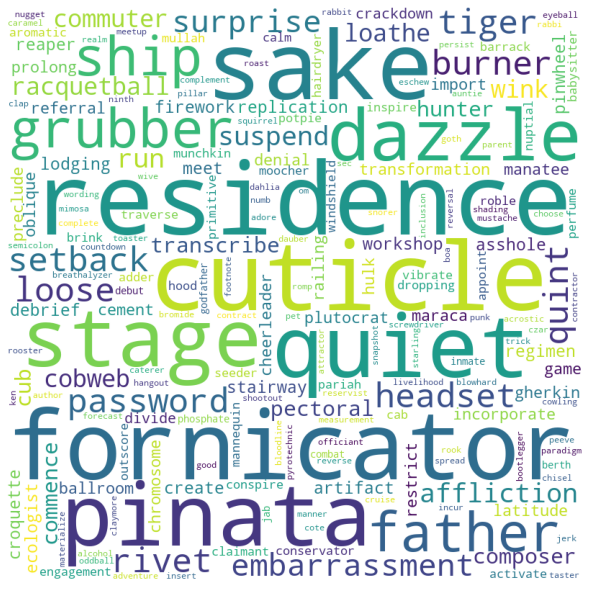

In [47]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in list(set(words)): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

# generando worldcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
words

['thanks',
 'rt',
 'gonna',
 'dc',
 'anytime',
 'soon',
 'love',
 'see',
 'way',
 'way',
 'long',
 'meet',
 'someone',
 'special',
 'know',
 'heart',
 'beat',
 'rapidly',
 'smile',
 'reason',
 'decided',
 'fun',
 'tired',
 'played',
 'tag',
 'ran',
 'lot',
 'going',
 'sleep',
 'like',
 'minutes',
 'words',
 'complete',
 'stranger',
 'made',
 'birthday',
 'even',
 'better',
 'first',
 'cubs',
 'game',
 'ever',
 'field',
 'gorgeous',
 'perfect',
 'go',
 'cubs',
 'go',
 'get',
 'another',
 'day',
 'due',
 'wonderful',
 'snow',
 'wakes',
 'damn',
 'thing',
 'coo',
 'jus',
 'work',
 'tired',
 'ever',
 'new',
 'commercial',
 'love',
 'first',
 'sight',
 'need',
 'reconnect',
 'week',
 'always',
 'wonder',
 'guys',
 'auctions',
 'shows',
 'learned',
 'talk',
 'fast',
 'hear',
 'catch',
 'great',
 'picture',
 'green',
 'shirt',
 'totally',
 'brings',
 'eyes',
 'desk',
 'put',
 'together',
 'room',
 'set',
 'oh',
 'boy',
 'oh',
 'boy',
 'beauty',
 'brainstorming',
 'alchemy',
 'office',
 'sally

# Iniciando Predicción de Palabras
Se utiliza Keras para la predicción

In [35]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [37]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['thanks', 'rt', 'gonna', 'dc', 'anytime']
soon


In [39]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        
        X[i, j, unique_word_index[each_word]] = 1
        
    Y[i, unique_word_index[next_words[i]]] = 1

MemoryError: Unable to allocate 3.63 TiB for an array with shape (14259814, 5, 55944) and data type bool

In [8]:
print(X[0][0])

[False False False ... False False False]


In [42]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [43]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]

In [12]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [13]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

In [14]:
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [16]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [17]:
q =  "Your life will never be the same again"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  Your life will never be the same again
Sequence:  your life will never be
your
life
will
never
be
next possible words:  ['a', 'of', 'the', 'to', 'so']
